<h1>Portfolio Optimization Investigation</h1>

I want to pick a number of assets and formulate their optimal weightings over a certain time, t.
I take the data from yahoo finance (csvs or yfinance?), and will balance with LP formulations (Quadratic?)

In [71]:
#!pip install yfinance
import yfinance as yf
import pandas as pd

#Choose asset tickers and pull daily close prices.

tickers = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'META', 'NVDA', 'TSLA']

start_date = '2021-09-01'
end_date = '2025-07-04'

price_data = yf.download(tickers, start=start_date, end=end_date)

df = price_data

print(df.head())

C:\Users\s2026970\AppData\Local\Temp\ipykernel_15684\343043725.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  price_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  7 of 7 completed

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2021-09-01  149.472794  173.949997  144.349792  379.965485  292.537994   
2021-09-02  150.590103  173.156006  142.432785  373.232422  291.878906   
2021-09-03  151.227112  173.902496  142.882584  374.207092  291.869171   
2021-09-07  153.569550  175.464493  143.420364  380.094727  290.938751   
2021-09-08  152.021042  176.274994  142.834366  375.509918  290.967804   

Price                                    High                          ...  \
Ticker           NVDA        TSLA        AAPL        AMZN       GOOGL  ...   
Date                                                                   ...   
2021-09-01  22.397379  244.696671  151.893605  176.350006  145.382099  ...   
2021-09-02  22.352468  244.130005  151.638802  175.598007  144.651974  ...   
2021-09-03  22.79

In [ ]:
#What types of data are held in the dataframe?
df.columns.get_level_values(0).unique()

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [73]:
close_prices = df['Close']
close_prices

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2021-09-01,149.472794,173.949997,144.349792,379.965485,292.537994,22.397379,244.696671
2021-09-02,150.590103,173.156006,142.432785,373.232422,291.878906,22.352468,244.130005
2021-09-03,151.227112,173.902496,142.882584,374.207092,291.869171,22.798603,244.523331
2021-09-07,153.569550,175.464493,143.420364,380.094727,290.938751,22.617949,250.973328
2021-09-08,152.021042,176.274994,142.834366,375.509918,290.967804,22.295578,251.289993
...,...,...,...,...,...,...,...
2025-06-27,201.080002,223.300003,178.529999,733.630005,495.940002,157.750000,323.630005
2025-06-30,205.169998,219.389999,176.229996,738.090027,497.410004,157.990005,317.660004
2025-07-01,207.820007,220.460007,175.839996,719.219971,492.049988,153.300003,300.709991


In [74]:
close_prices.shape

(963, 7)

In [75]:
print(close_prices.isna().sum().sum())
close_prices.dropna()

0


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2021-09-01,149.472794,173.949997,144.349792,379.965485,292.537994,22.397379,244.696671
2021-09-02,150.590103,173.156006,142.432785,373.232422,291.878906,22.352468,244.130005
2021-09-03,151.227112,173.902496,142.882584,374.207092,291.869171,22.798603,244.523331
2021-09-07,153.569550,175.464493,143.420364,380.094727,290.938751,22.617949,250.973328
2021-09-08,152.021042,176.274994,142.834366,375.509918,290.967804,22.295578,251.289993
...,...,...,...,...,...,...,...
2025-06-27,201.080002,223.300003,178.529999,733.630005,495.940002,157.750000,323.630005
2025-06-30,205.169998,219.389999,176.229996,738.090027,497.410004,157.990005,317.660004
2025-07-01,207.820007,220.460007,175.839996,719.219971,492.049988,153.300003,300.709991


In [ ]:
#Calculate DoD returns, dropping first day NaNs
returns = close_prices.pct_change().dropna()    #drop NaNs as first entry has nothing to be compared to
print(returns.shape)
print(returns.head())

(962, 7)
Ticker          AAPL      AMZN     GOOGL      META      MSFT      NVDA  \
Date                                                                     
2021-09-02  0.007475 -0.004564 -0.013280 -0.017720 -0.002253 -0.002005   
2021-09-03  0.004230  0.004311  0.003158  0.002611 -0.000033  0.019959   
2021-09-07  0.015490  0.008982  0.003764  0.015734 -0.003188 -0.007924   
2021-09-08 -0.010083  0.004619 -0.004086 -0.012062  0.000100 -0.014253   
2021-09-09 -0.006705 -0.011726 -0.001044  0.001139 -0.009860 -0.007252   

Ticker          TSLA  
Date                  
2021-09-02 -0.002316  
2021-09-03  0.001611  
2021-09-07  0.026378  
2021-09-08  0.001262  
2021-09-09  0.001313  


In [77]:
#Key Statistics
mean_returns = returns.mean()

cov_matrix = returns.cov()

corr_matrix = returns.corr()

vols = returns.std()

In [ ]:
#Create weights vector representing the portfolio to optimise. Optimal weights represent the proportions of stocks to hold
import numpy as np
weights = np.ones(len(mean_returns)) / len(mean_returns)

port_return = np.dot(weights, mean_returns)
port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [79]:
from scipy.optimize import minimize

In [ ]:
n_assets = len(tickers)

def objective(weights, cov_matrix, lambda_reg = 0.01):
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    l2_penalty = lambda_reg * np.sum(weights**2)
    return port_vol + l2_penalty                                        #Optimization by minimizing volatility and L2 regularisation

constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
bounds = tuple((0, 1) for _ in range(n_assets))

init_guess = np.ones(n_assets) / n_assets

result = minimize(objective,
                  init_guess,
                  args = (cov_matrix,),
                  method = 'SLSQP',
                  bounds = bounds,
                  constraints = constraints)

optimal_weights = result.x
print(optimal_weights)

[3.05571773e-01 1.34839648e-01 2.24566186e-01 3.34557351e-02
 3.01146797e-01 7.80625564e-18 4.19860528e-04]


In [81]:
optimal_portfolio = pd.Series(optimal_weights.round(6), index = tickers)
print(optimal_portfolio)

GOOGL    0.305572
AMZN     0.134840
AAPL     0.224566
MSFT     0.033456
META     0.301147
NVDA     0.000000
TSLA     0.000420
dtype: float64


<Axes: title={'center': 'Rolling Optimization'}>

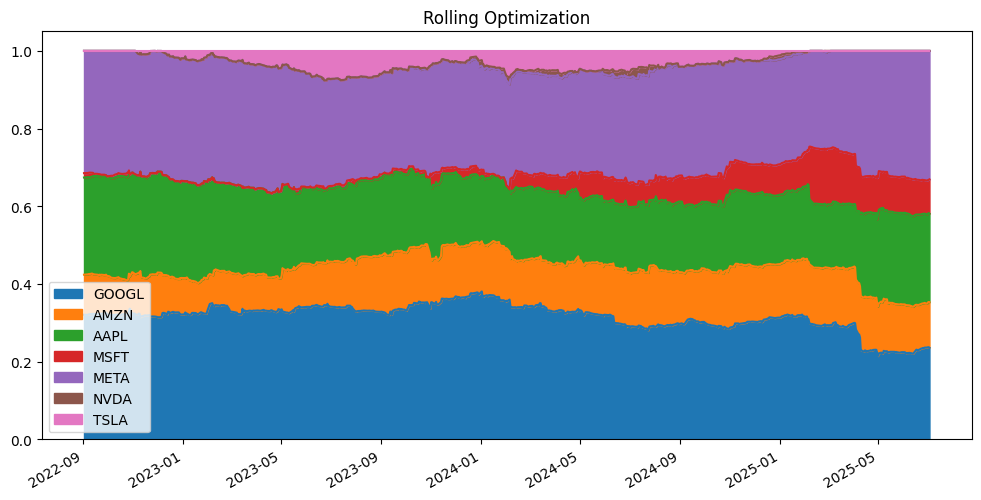

In [ ]:
#Rolling optimization considers a window (Previous 252 days (1 trading year)) of historical trading data
#and rebalances every step.

window = 252
step = 1
dates = []
weights_list = []

for start in range(0, len(returns) - window, step):
    end = start + window
    window_returns = returns.iloc[start:end]

    mean_returns = window_returns.mean()
    cov_matrix = window_returns.cov()
    
    def obj(weights, cov_matrix, lambda_reg = 0.01):                        #Obj uses L2 regularisation and 
        port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        l2_penalty = lambda_reg * np.sum(weights**2)
        return port_vol + l2_penalty
    
    constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(n_assets))

    init_guess = np.ones(n_assets) / n_assets

    result = minimize(obj,
                      init_guess,
                      args = (cov_matrix,),
                      method='SLSQP',
                      bounds=bounds,
                      constraints=constraints)
    
    date = returns.index[end]
    weights = result.x if result.success else np.zeros(n_assets)
    weights_list.append(weights)
    dates.append(date)

weights_df = pd.DataFrame(weights_list, index = dates, columns = tickers)

weights_df.plot.area(figsize = (12, 6), title = 'Rolling Optimization')

Does the for loop work as expected? what does len(returs) - window output?